In [1]:
using Plots
gadfly()
default(leg=false,size=(400,400));
#debugplots();

[Plots.jl] Default backend: immerse
[Plots.jl] Switched to backend: gadfly

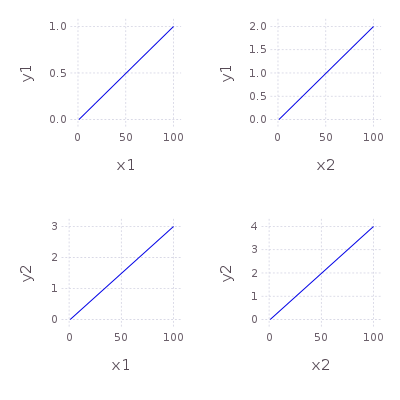

In [30]:
y = linspace(0,1,100)
p = subplot(Any[y*i for i in 1:4],n=4)
subplot!(ylabel=["y1","y1","y2","y2"], xlabel=["x1","x2","x1","x2"])

In [31]:
function addOrReplace(v::AbstractVector, t::DataType, args...; kw...)
    for (i,vi) in enumerate(v)
        if isa(vi, t)
            v[i] = t(args...; kw...)
            return
        end
    end
    push!(v, t(args...; kw...))
    return
end

# link the subplots together to share axes... useful for facet plots, cross-scatters, etc
function linkXAxis(subplt::Plots.Subplot{Plots.GadflyPackage})
    
    for (i,(r,c)) in enumerate(p.layout)
        gplt = p.plts[i].o
        if r < Plots.nrows(p.layout)
            #addOrReplace(gplt.guides, Gadfly.Guide.xticks; label=false)
            addOrReplace(gplt.guides, Gadfly.Guide.xlabel, "")
        end
    end
    
    lims = [Inf,-Inf]     
    for plt in p.plts
        for l in plt.o.layers
            Plots.expandLimits!(lims, l.mapping[:x])
        end
    end
    for plt in p.plts
        xlims!(plt, lims...)
    end
        
end

# link the subplots together to share axes... useful for facet plots, cross-scatters, etc
function linkYAxis(subplt::Plots.Subplot{Plots.GadflyPackage})
    
    for (i,(r,c)) in enumerate(p.layout)
        gplt = p.plts[i].o
        if c > 1
            #addOrReplace(gplt.guides, Gadfly.Guide.yticks; label=false)
            addOrReplace(gplt.guides, Gadfly.Guide.ylabel, "")
        end
    end
    
    lims = [Inf,-Inf]
    for plt in p.plts
        for l in plt.o.layers
            Plots.expandLimits!(lims, l.mapping[:y])
        end
    end
    for plt in p.plts
        ylims!(plt, lims...)
    end
        
end

# # findGuideAndSet(gplt, t::DataType, s::@compat(AbstractString))
# for (i,(r,c)) in enumerate(p.layout)
#     gplt = p.plts[i].o
#     if r < Plots.nrows(p.layout)
# #         push!(gplt.guides, Gadfly.Guide.xticks(label=false))
# #         Plots.findGuideAndSet(gplt, Gadfly.Guide.xlabel, "")
#         addOrReplace(gplt.guides, Gadfly.Guide.xticks; label=false)
#         addOrReplace(gplt.guides, Gadfly.Guide.xlabel, "")
#     end
#     if c > 1
#         addOrReplace(gplt.guides, Gadfly.Guide.yticks, label=false)
#         addOrReplace(gplt.guides, Gadfly.Guide.ylabel, "")
# #         #push!(gplt.guides, Gadfly.Guide.yticks(label=false))
# #         Plots.findGuideAndSet(gplt, Gadfly.Guide.yticks, label=false)
# #         Plots.findGuideAndSet(gplt, Gadfly.Guide.ylabel, "")
#     end
# end
# #p1 = p.plts[1].o
# #push!(p1.guides, Gadfly.Guide.xticks(label=false,ticks=nothing))
# p

linkYAxis (generic function with 1 method)

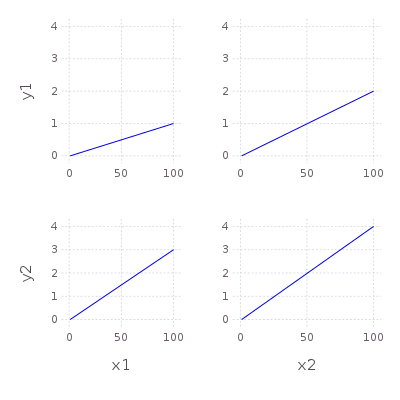

In [32]:
linkXAxis(p)
linkYAxis(p)
p

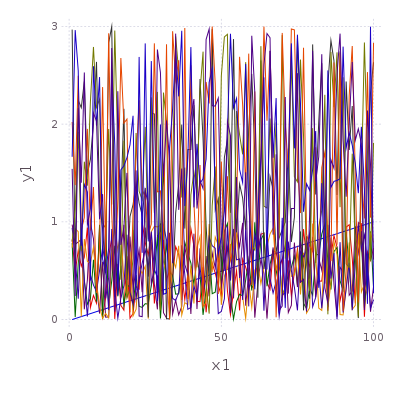

In [19]:
gplt = p.plts[1].o
plot!(p.plts[1], rand(100,5)*3)

In [22]:
lims = [Inf,-Inf]
for l in gplt.layers
    Plots.expandLimits!(lims, l.mapping[:y])
end
lims

2-element Array{Float64,1}:
 0.0    
 2.99946

In [ ]:
p = subplot(repmat(y,1,4),layout=[1,1,2])

[Plots.jl] Switched to backend: gadfly

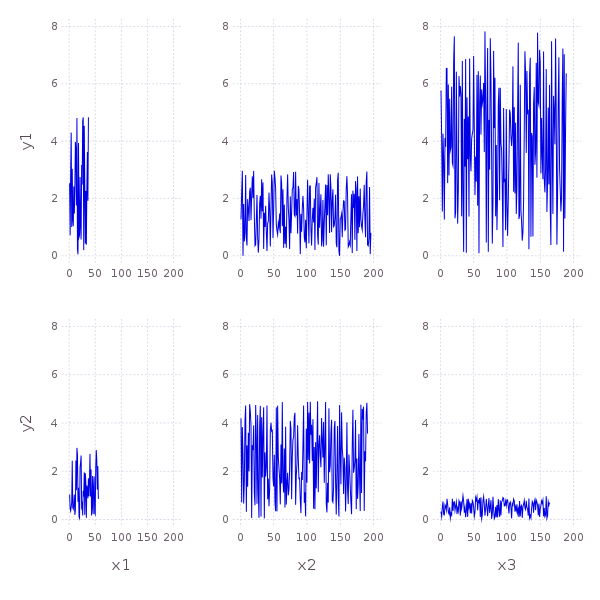

In [10]:
using Plots, StatsBase; gadfly()
default(size=(600,600),leg=false)
p = subplot(Any[rand(sample(10:200))*sample(1:10) for i in 1:6], n=6, link=true)
subplot!(xlabel=["x1","x2","x3"], ylabel=["y1","","","y2"])

INFO: Recompiling stale cache file /home/tom/.julia/lib/v0.4/Plots.ji for module Plots.


[Plots.jl] Default backend: immerse
[Plots.jl] Switched to backend: gadfly
[Plots.jl] Initializing backend: gadfly

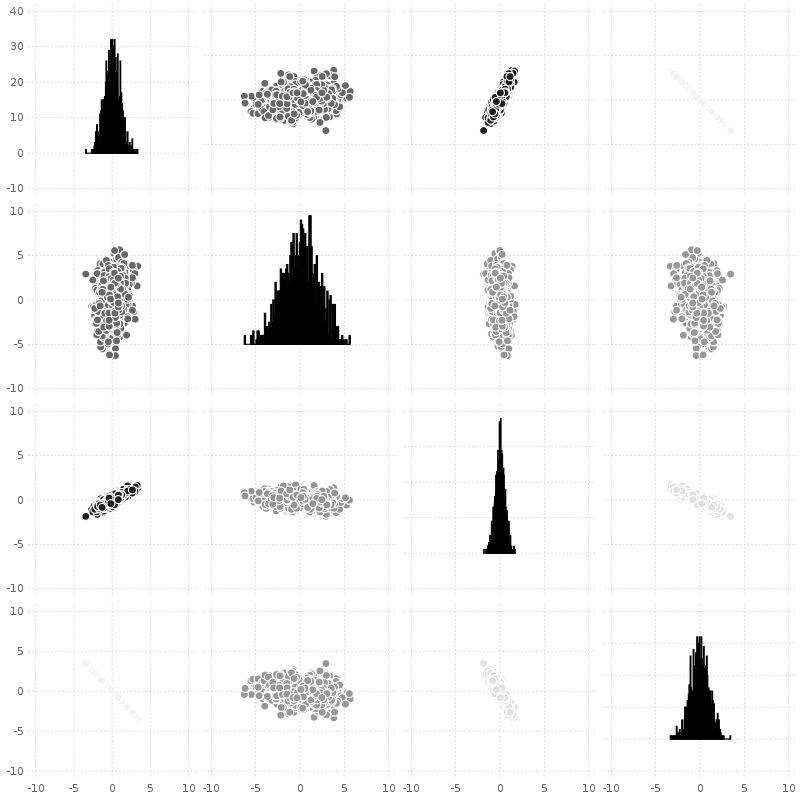

In [1]:
using Plots, OnlineStats
gadfly()
default(size=(800,800),leg=false)

n = 1000
x = randn(n)
y = 2randn(n) + 0.5x
z = 0.2randn(n) + 0.5x - 0.1y
v = -x

M = [x y z v]
m = size(M,2)
C = cor(CovarianceMatrix(M))

corrplot(M,C, colors=[:red,])

In [15]:
ColorGradient(:redsblues,[-1,1])

Plots.ColorGradient(ColorTypes.Colorant[RGB{U8}(0.545,0.0,0.0),RGB{Float64}(0.8,0.85,0.8),RGB{U8}(0.0,0.0,0.545)],[-1.0,0.0,1.0])

In [ ]:
fl = FlexLayout(5, [2,1,2])
gl = GridLayout(3,2)

In [ ]:
for (r,c) in gl
    @show r,c
end
length(gl)